In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [0]:
%matplotlib inline

In [0]:
file_path = "/content/drive/My Drive/ts_example/ts_data.xlsx"

In [0]:
df = pd.read_excel(file_path)

In [132]:
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


In [133]:
df.shape

(10000, 2)

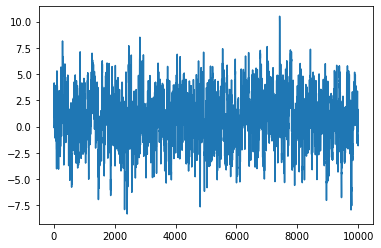

In [134]:
plt.plot(df["Value"])

In [135]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


<center><h1>Auto Regressive Model</h1></center>

$$
Y_{t}=\alpha+\beta_{1} Y_{t-1}+\beta_{2} Y_{t-2}+\ldots+\beta_{p} Y_{t-p}+\epsilon_{1}
$$

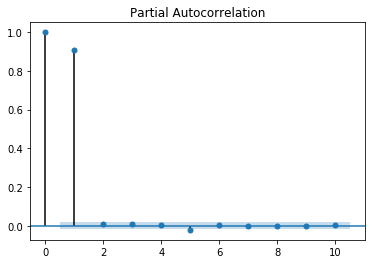

In [136]:
plot_pacf(X, lags=10);

In [0]:
df["Values_shifted"]  = df["Value"].shift()

In [138]:
df.head()

,Time,Value,Values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263
3,4,1.247887,0.749995
4,5,0.131282,1.247887


In [0]:
df.drop('Time', axis = 1, inplace=True)

In [0]:
df.dropna(inplace=True)

In [141]:
df.head()

,Value,Values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
5,0.562619,0.131282


In [0]:
y = df.Value.values
X = df.Values_shifted.values

In [0]:
train_size = int(len(X) * 0.80)

In [0]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [0]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [146]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
lr.coef_

array([0.90550879])

In [148]:
lr.intercept_

0.06868111625452289

In [0]:
y_pred = lr.predict(X_test)

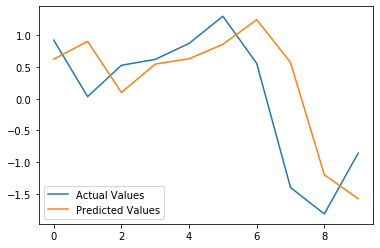

In [150]:
plt.plot(y_test[-10:], label="Actual Values")
plt.plot(y_pred[-10:], label="Predicted Values")
plt.legend()
plt.show()

In [0]:
model = ARIMA(y_train, order=(1,0,0))

In [0]:
model_fit = model.fit()

In [153]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7999
Model:                     ARMA(1, 0)   Log Likelihood              -11364.832
Method:                       css-mle   S.D. of innovations              1.002
Date:                Sun, 12 Jan 2020   AIC                          22735.663
Time:                        14:42:57   BIC                          22756.624
Sample:                             0   HQIC                         22742.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.118      6.130      0.000       0.493       0.957
ar.L1.y        0.9054      0.005    190.940      0.000       0.896       0.915
                                    Roots           